# Análisis y Clasificación de Ciberacoso en Twitter
Daniel Acosta

## Introducción

Hoy en día, las redes sociales forman parte esencial de la vida cotidiana. Nos permiten compartir ideas, expresar emociones y conectar con personas de todo el mundo. Sin embargo, también se han convertido en espacios donde puede surgir violencia digital, como el ciberacoso o los discursos de odio.

Este proyecto busca analizar publicaciones de Twitter para entender cómo se manifiestan estos comportamientos en línea. Empleando técnicas de minería de datos y procesamiento de lenguaje natural (PLN) para detectar patrones de lenguaje ofensivo, emociones predominantes y posibles señales de alerta.

A partir de un conjunto de tuits ya etiquetados como mensajes con o sin ciberacoso, aplicaremos herramientas de análisis de sentimientos y modelos de clasificación automática para predecir y visualizar cómo se expresan estas formas de violencia. El trabajo sigue la metodología CRISP-DM, permitiendo avanzar paso a paso desde la comprensión del problema hasta el desarrollo de un modelo útil y aplicable.

## Comprensión del negocio

El ciberacoso es una forma de violencia que se manifiesta a través de mensajes agresivos, humillantes o amenazantes en plataformas digitales. A diferencia del acoso tradicional, este tipo de agresión puede ocurrir en cualquier momento y alcanzar a muchas personas al mismo tiempo, lo que agrava su impacto emocional y psicológico.

En este contexto, surge la necesidad de contar con herramientas que permitan detectar estos comportamientos de manera automática, rápida y precisa. Este proyecto se enfoca en usar técnicas de minería de datos para entender cómo se comunican los agresores en redes sociales, qué tipo de lenguaje utilizan y qué emociones suelen expresar.

Desde el punto de vista social, comprender cómo se manifiesta el ciberacoso en espacios como Twitter puede ayudar a generar estrategias de prevención y respuesta más efectivas. Además, puede apoyar a instituciones educativas, comunidades en línea y desarrolladores de plataformas a implementar medidas de protección para los usuarios.

## Comprensión de los datos

Antes de comenzar con cualquier análisis, es importante conocer el tipo de información con la que vamos a trabajar. En este caso, vamos a utilizar un conjunto de datos extraído de Kaggle llamado *Cyberbullying Tweets* [link](https://www.kaggle.com/datasets/soorajtomar/cyberbullying-tweets/data), que contiene mensajes publicados en Twitter, algunos de ellos clasificados como ciberacoso y otros como no ofensivos.

Este dataset no solo nos dice si un tuit es agresivo o no, sino que también indica el tipo de acoso que representa: puede ser por razones raciales, religiosas, de orientación sexual, entre otros. Esta clasificación nos permitirá analizar los distintos matices de la violencia digital y entrenar modelos que puedan aprender a detectarlos.

El primer paso será descargar los archivos y revisar cuántos tuits hay, qué columnas tiene la base de datos y cómo están organizados los textos. Así podremos tener una idea más clara de la calidad del dataset y de los pasos que necesitaremos seguir para prepararlo adecuadamente.


In [1]:
import kagglehub
import os
import pandas as pd

# Descargar el dataset completo
dataset_path = kagglehub.dataset_download("soorajtomar/cyberbullying-tweets")

# Ver los archivos descargados
print("Archivos descargados:")
print(os.listdir(dataset_path))

# Ruta del archivo correcto (ajústalo si ves un nombre distinto al listar)
csv_file = os.path.join(dataset_path, "CyberBullying Comments Dataset.csv")

# Cargar el CSV
df = pd.read_csv(csv_file)

# Mostrar primeras filas
print("Primeras 5 filas del dataset:")
display(df.head())


/home/aedaniel/Documentos/UAIE/MCPI/Minería de Datos/git/mcpi-dm/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Archivos descargados:
['CyberBullying Comments Dataset.csv']
Primeras 5 filas del dataset:


,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0


### Carga y descripción inicial del dataset

Después de descargar el dataset desde Kaggle, revisamos los archivos disponibles y encontramos uno llamado **"CyberBullying Comments Dataset.csv"**. Este archivo contiene mensajes de Twitter junto con una etiqueta que indica si el comentario es ofensivo o no.

Cada fila tiene dos columnas:
- **Text**: el contenido del tuit (en inglés).
- **CB_Label**: una etiqueta que indica si se trata de ciberacoso.

El significado de las etiquetas en la columna **CB_Label** es el siguiente:
- **0**: el comentario **no** presenta señales de ciberacoso (es un mensaje neutral o sin agresión).
- **1**: el comentario **sí** es considerado como ciberacoso.


In [2]:
# Mostrar estructura general del DataFrame
print("Información general del dataset:")
display(df.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
display(df.isnull().sum())

# Distribución de clases (0: no ciberacoso, 1: ciberacoso)
print("\nDistribución de clases:")
display(df["CB_Label"].value_counts())

# Porcentaje de cada clase
print("\nPorcentaje de cada clase:")
display(df["CB_Label"].value_counts(normalize=True) * 100)

# Longitud de los textos (en número de caracteres)
df["text_length"] = df["Text"].astype(str).apply(len)

print("\nEstadísticas descriptivas de la longitud de los textos:")
display(df["text_length"].describe())

# Ejemplos de tuits ofensivos
print("\nEjemplos de mensajes etiquetados como ciberacoso:")
display(df[df["CB_Label"] == 1].sample(5, random_state=42))

# Ejemplos de tuits no ofensivos
print("\nEjemplos de mensajes NO etiquetados como ciberacoso:")
display(df[df["CB_Label"] == 0].sample(5, random_state=42))


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      11100 non-null  object
 1   CB_Label  11100 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 173.6+ KB


None


Valores nulos por columna:


Text        0
CB_Label    0
dtype: int64


Distribución de clases:


CB_Label
0    5550
1    5550
Name: count, dtype: int64


Porcentaje de cada clase:


CB_Label
0    50.0
1    50.0
Name: proportion, dtype: float64


Estadísticas descriptivas de la longitud de los textos:


count    11100.000000
mean        89.140811
std         98.182573
min          1.000000
25%         40.000000
50%         72.000000
75%        114.000000
max       4016.000000
Name: text_length, dtype: float64


Ejemplos de mensajes etiquetados como ciberacoso:


,Text,CB_Label,text_length
7469,At the C's before I hit the hay. Still hate Bo...,1,51
10765,"""Aas opposed to an EUloon mentalcase like you,...",1,52
9801,"""Hay Richard (Dick-head), when are you going t...",1,545
5780,Pretty much but now there will be less AIM er...,1,104
8910,"""You're terrible and you've got 28 dislikes. L...",1,94



Ejemplos de mensajes NO etiquetados como ciberacoso:


,Text,CB_Label,text_length
1919,Thanks ur an angel. my header is horrible I h...,0,122
5215,Sucky,0,7
4251,depends on the restaurants policies,0,37
230,Haha yeah. Jack's already gay. We're just tryi...,0,78
3360,Oooh...that sucks. I wish I could help. :(,0,42


### Exploración inicial del dataset

Después de cargar el dataset, realizamos una primera revisión para conocer su estructura y calidad. 

- El archivo contiene 11,100 tuits, cada uno con su texto y una etiqueta (CB_Label) que indica si se trata de ciberacoso (1) o no (0).
- No hay valores nulos, no será necesario limpiar datos faltantes.
- La distribución de clases está balanceada: el 50% de los mensajes son considerados ciberacoso y el otro 50% no lo son. 

También se analiza la longitud de los textos:
- En promedio, los mensajes tienen 89 caracteres, aunque hay bastante variación.
- El más corto tiene solo 1 carácter y el más largo llega hasta 4,016, lo que probablemente corresponde a cadenas concatenadas o texto atípico.
- La mayoría de los mensajes están entre 40 y 114 caracteres, lo cual es típico en tweets.

Finalmente, se revisaron algunos ejemplos reales. Los tuits marcados como ciberacoso contienen lenguaje ofensivo, sarcasmo o insultos directos, mientras que los mensajes sin ciberacoso suelen ser neutrales o amables, aunque también pueden ser breves o informativos.

Con esta revisión preliminar, ya se cuenta con una idea del contenido del dataset, se procede a trabajar en su análisis y preparación para modelado.


## Preparación de los datos

Antes de aplicar cualquier modelo de análisis o clasificación, es fundamental preparar adecuadamente los datos. En este caso, como trabajamos con texto, el objetivo principal será limpiar y normalizar los mensajes para facilitar su interpretación por parte de los algoritmos.

Esto implica realizar varias tareas:
- Convertir todo el texto a **minúsculas**, para evitar que una misma palabra se trate como distinta por tener mayúsculas.
- Eliminar **caracteres especiales**, símbolos, signos de puntuación innecesarios y enlaces.
- Quitar palabras vacías o comunes (**stopwords**), que suelen no aportar mucho significado (como "the", "and", "to", etc.).
- Opcionalmente, podríamos aplicar técnicas como **lematización** o **stemming**, que ayudan a reducir las palabras a su forma base (por ejemplo, "running" → "run").

Estas acciones ayudan a reducir el ruido en los datos y permiten que el modelo se enfoque en las palabras clave que realmente diferencian un mensaje ofensivo de uno que no lo es. Una vez que los textos estén limpios, estaremos listos para extraer características y construir representaciones útiles del lenguaje.

### ¿Qué es lematización y stemming?

Cuando trabajamos con texto, muchas palabras pueden aparecer en diferentes formas, pero tener el mismo significado base. Por ejemplo:

- "run", "running", "runs", "ran" : todas están relacionadas con la acción de correr.
- "happy", "happily", "happiness" : expresan una idea común, pero con distintas terminaciones.

Para ayudar a los algoritmos a identificar patrones de manera más eficiente, existen técnicas que reducen las palabras a su raíz o forma base. Aquí es donde entran el **stemming** y la **lematización**:

- **Stemming**: es una técnica más rápida y simple. Recorta las palabras hasta llegar a una especie de "raíz", aunque no siempre sea una palabra real. Por ejemplo, "running", "runner" y "ran" podrían convertirse en "run" o incluso algo como "runn". Funciona bien para tareas básicas, pero puede perder precisión.

- **Lematización**: es una técnica más sofisticada. En lugar de cortar, analiza la palabra considerando su contexto gramatical y la reduce a una forma base correcta (llamada "lema"). Por ejemplo, "ran" se convertiría en "run", y "better" se lematizaría como "good". Requiere más procesamiento, pero es más precisa y mantiene mejor el significado.

Ambas técnicas tienen sus ventajas. En este proyecto, si el objetivo es precisión lingüística (como en análisis de sentimiento o interpretación emocional), la lematización suele ser la mejor opción. Si buscamos velocidad en conjuntos de datos grandes, el stemming puede ser suficiente.


In [3]:
import re

# Función de limpieza básica
def limpiar_texto(texto):
    texto = texto.lower()  # convertir a minúsculas
    texto = re.sub(r"http\S+|www.\S+", "", texto)  # eliminar URLs
    texto = re.sub(r"@\w+|#\w+", "", texto)        # eliminar menciones y hashtags
    texto = re.sub(r"[^a-z\s]", "", texto)         # eliminar signos de puntuación y números
    texto = re.sub(r"\s+", " ", texto).strip()     # eliminar espacios extra
    return texto

# Aplicar la limpieza a la columna de texto
df["clean_text"] = df["Text"].astype(str).apply(limpiar_texto)

# Mostrar ejemplos antes y después
print("Ejemplos antes y después de la limpieza:")
ejemplos = df[["Text", "clean_text"]].sample(5, random_state=42)
display(ejemplos)

Ejemplos antes y después de la limpieza:


,Text,clean_text
2483,I hate to point out that the new one is much c...,i hate to point out that the new one is much c...
1498,Yeah. I'm not going to go offf about how long ...,yeah im not going to go offf about how long th...
5438,Yeah im all alone currently waiting for timo...,yeah im all alone currently waiting for timoth...
7317,I will kick that pirate's ass if he got marrie...,i will kick that pirates ass if he got married...
6380,dont hate too hard! it hasn't been very warm ...,dont hate too hard it hasnt been very warm her...


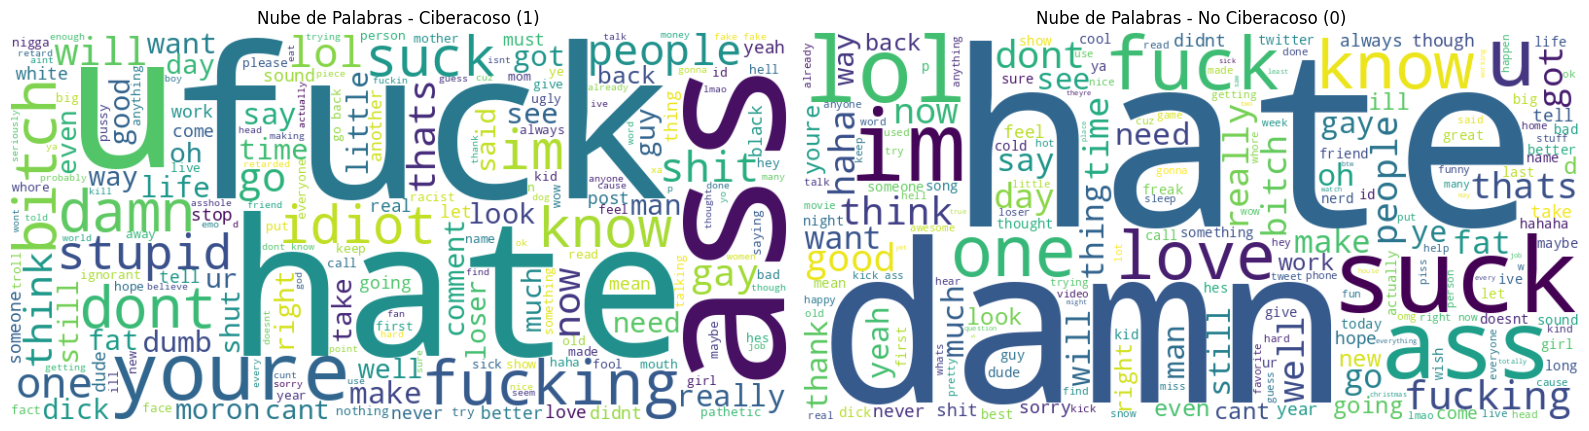

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrar por clase
textos_acoso = " ".join(df[df["CB_Label"] == 1]["clean_text"].dropna())
textos_no_acoso = " ".join(df[df["CB_Label"] == 0]["clean_text"].dropna())

# Configurar y generar las nubes
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(textos_acoso)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title("Nube de Palabras - Ciberacoso (1)")
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud0 = WordCloud(width=800, height=400, background_color='white').generate(textos_no_acoso)
plt.imshow(wordcloud0, interpolation='bilinear')
plt.title("Nube de Palabras - No Ciberacoso (0)")
plt.axis('off')

plt.tight_layout()
plt.show()


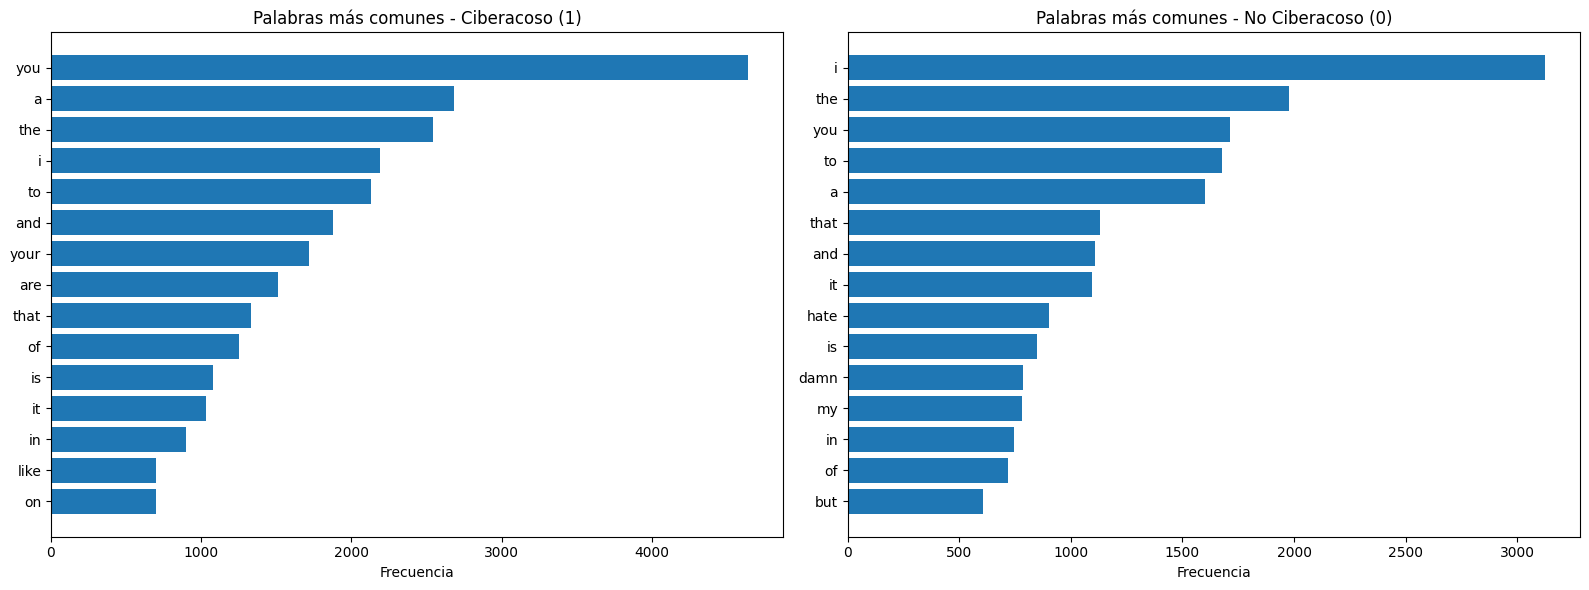

In [5]:
from collections import Counter

# Tokenización simple por espacios
palabras_acoso = " ".join(df[df["CB_Label"] == 1]["clean_text"]).split()
palabras_no_acoso = " ".join(df[df["CB_Label"] == 0]["clean_text"]).split()

# Contar las palabras más comunes
conteo_acoso = Counter(palabras_acoso).most_common(15)
conteo_no_acoso = Counter(palabras_no_acoso).most_common(15)

# Convertir a listas para graficar
palabras1, frecs1 = zip(*conteo_acoso)
palabras0, frecs0 = zip(*conteo_no_acoso)

# Graficar
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.barh(palabras1[::-1], frecs1[::-1])
plt.title("Palabras más comunes - Ciberacoso (1)")
plt.xlabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.barh(palabras0[::-1], frecs0[::-1])
plt.title("Palabras más comunes - No Ciberacoso (0)")
plt.xlabel("Frecuencia")

plt.tight_layout()
plt.show()


In [6]:
# Mostrar palabras más comunes en mensajes de ciberacoso
print("Top 15 palabras más comunes en mensajes etiquetados como ciberacoso (1):")
for palabra, frecuencia in conteo_acoso:
    print(f"{palabra:<15} {frecuencia}")

print("\nTop 15 palabras más comunes en mensajes NO etiquetados como ciberacoso (0):")
for palabra, frecuencia in conteo_no_acoso:
    print(f"{palabra:<15} {frecuencia}")


Top 15 palabras más comunes en mensajes etiquetados como ciberacoso (1):
you             4642
a               2680
the             2544
i               2192
to              2132
and             1880
your            1716
are             1508
that            1330
of              1251
is              1081
it              1031
in              897
like            700
on              697

Top 15 palabras más comunes en mensajes NO etiquetados como ciberacoso (0):
i               3125
the             1977
you             1715
to              1678
a               1599
that            1130
and             1107
it              1093
hate            903
is              848
damn            786
my              783
in              745
of              717
but             607


## Análisis de palabras frecuentes

Una vez que limpiamos los textos, exploramos cuáles son las palabras más usadas en los tuits etiquetados como ciberacoso y en los que no lo son. Esta comparación nos ayuda a entender cómo se expresa la agresión digital y qué tipo de lenguaje la caracteriza.

### Mensajes con ciberacoso (CB_Label = 1)

Las palabras más frecuentes en este grupo incluyen:

- **you, your, are**: La mayoría de los mensajes ofensivos están dirigidos directamente a otra persona. Esto muestra un tono confrontativo, donde se busca atacar o molestar al receptor.
- También se repiten palabras como **like, that, it**, que pueden formar parte de críticas o comparaciones.
- Aunque aparecen términos comunes como **the, a, of**, su presencia en mensajes agresivos muestra que incluso con lenguaje cotidiano se puede construir un mensaje hiriente.

En resumen, el ciberacoso suele expresarse de manera personal y directa, con un enfoque claro hacia la otra persona.

### Mensajes sin ciberacoso (CB_Label = 0)

En los tuits considerados no ofensivos, también encontramos palabras comunes, pero con algunas diferencias importantes:

- Palabras como **i, my, but** nos dicen que los mensajes tienden a ser más personales y reflexivos, enfocados en quien escribe, no en atacar a otros.
- Aparecen términos como **damn** o **hate**, que a simple vista pueden parecer agresivos, pero que muchas veces se usan para exagerar o expresar frustración sin intención de dañar (por ejemplo: "I hate Mondays").

Esto nos muestra que el lenguaje fuerte no siempre significa violencia: el contexto y la intención son clave para interpretar correctamente lo que alguien dice en línea.

Aunque ambos tipos de mensajes comparten muchas palabras, la diferencia está en cómo se usan. Los mensajes con ciberacoso tienden a estar dirigidos contra alguien más, mientras que los mensajes no ofensivos hablan más desde la experiencia personal.

### Preprocesamiento final

In [7]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Cargar modelo en inglés
nlp = spacy.load("en_core_web_sm")

# Función para aplicar lematización y quitar stopwords
def procesar_texto(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS and token.is_alpha]
    return " ".join(lemas)

# Aplicar al texto limpio
df["processed_text"] = df["clean_text"].apply(procesar_texto)

# Mostrar ejemplos
print("Ejemplos después de lematización y eliminación de stopwords:")
display(df[["Text", "clean_text", "processed_text"]].sample(5, random_state=42))


Ejemplos después de lematización y eliminación de stopwords:


,Text,clean_text,processed_text
2483,I hate to point out that the new one is much c...,i hate to point out that the new one is much c...,I hate point new close plot book movie originally
1498,Yeah. I'm not going to go offf about how long ...,yeah im not going to go offf about how long th...,yeah I m offf long dn d remake development damn
5438,Yeah im all alone currently waiting for timo...,yeah im all alone currently waiting for timoth...,yeah I m currently wait timothy home I miss
7317,I will kick that pirate's ass if he got marrie...,i will kick that pirates ass if he got married...,I kick pirate ass marry sayin
6380,dont hate too hard! it hasn't been very warm ...,dont hate too hard it hasnt been very warm her...,hate hard warm lately


## Preprocesamiento final: stopwords y lematización

Después de limpiar los textos, realizamos un último paso muy importante en el procesamiento del lenguaje: aplicar **lemmatización** y eliminar las **stopwords** (palabras vacías).

1. **Stopwords**: Son palabras muy comunes en el idioma, como "the", "and", "to" o "is". Aunque son necesarias para formar oraciones, no aportan mucho valor al momento de analizar el contenido. Por eso, las eliminamos para enfocarnos en las palabras clave que sí ayudan a distinguir entre mensajes ofensivos y no ofensivos.

2. **Lematización**: A diferencia del stemming (que solo recorta las palabras), la lematización convierte cada palabra a su forma base gramatical. Por ejemplo:
   - "running", "ran", "runs" : todas se convierten en "run"
   - "better" : se convierte en **“good”**
   
   Esto nos permite reducir la variabilidad del lenguaje sin perder el sentido de lo que se quiere decir.

Usamos una librería especializada llamada **spaCy**, que es una de las más completas para procesamiento de lenguaje natural. 
Instalación:

```bash
pip install spacy
python -m spacy download en_core_web_sm
```

Después, se aplica el modelo de idioma en inglés (en_core_web_sm) a cada tuit, eliminamos las stopwords y nos quedamos solo con las palabras clave lematizadas. El resultado se guarda en una nueva columna llamada processed_text, que ahora está lista para alimentar los modelos de clasificación.

Este paso mejora la calidad de nuestros datos y ayuda a que los algoritmos no se distraigan con palabras irrelevantes. De esta forma, se pueden construir modelos más precisos, que realmente aprendan a identificar patrones relacionados con el ciberacoso.

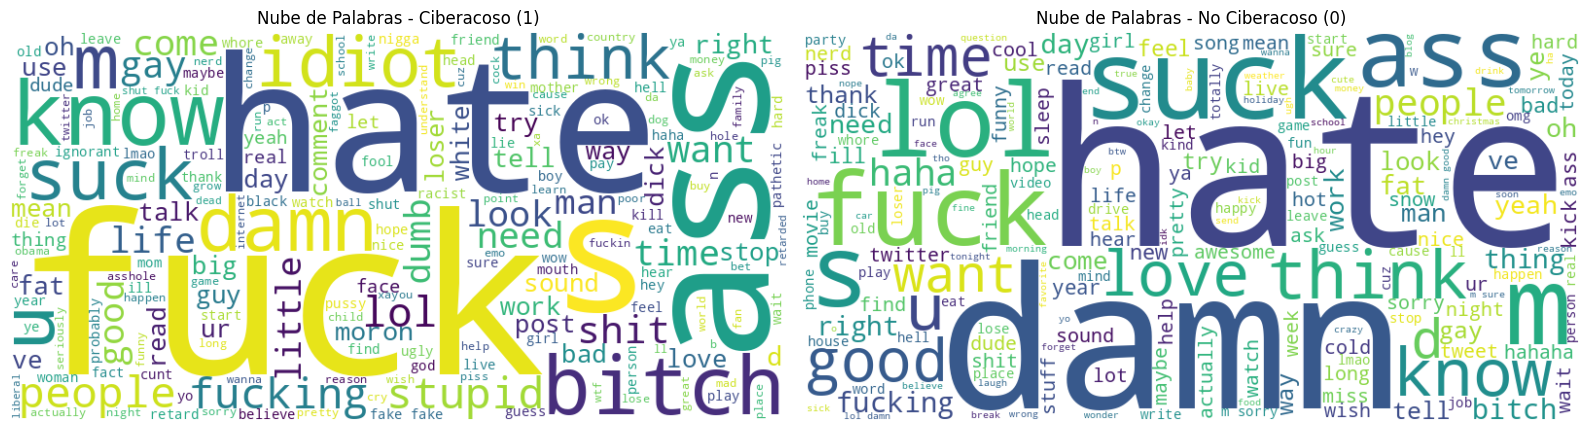

In [8]:
# Separar los textos lematizados por clase
texto_lemas_acoso = " ".join(df[df["CB_Label"] == 1]["processed_text"].dropna())
texto_lemas_no_acoso = " ".join(df[df["CB_Label"] == 0]["processed_text"].dropna())

# Crear nubes de palabras
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
wc_acoso = WordCloud(width=800, height=400, background_color='white').generate(texto_lemas_acoso)
plt.imshow(wc_acoso, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Ciberacoso (1)")

plt.subplot(1, 2, 2)
wc_no_acoso = WordCloud(width=800, height=400, background_color='white').generate(texto_lemas_no_acoso)
plt.imshow(wc_no_acoso, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - No Ciberacoso (0)")

plt.tight_layout()
plt.show()


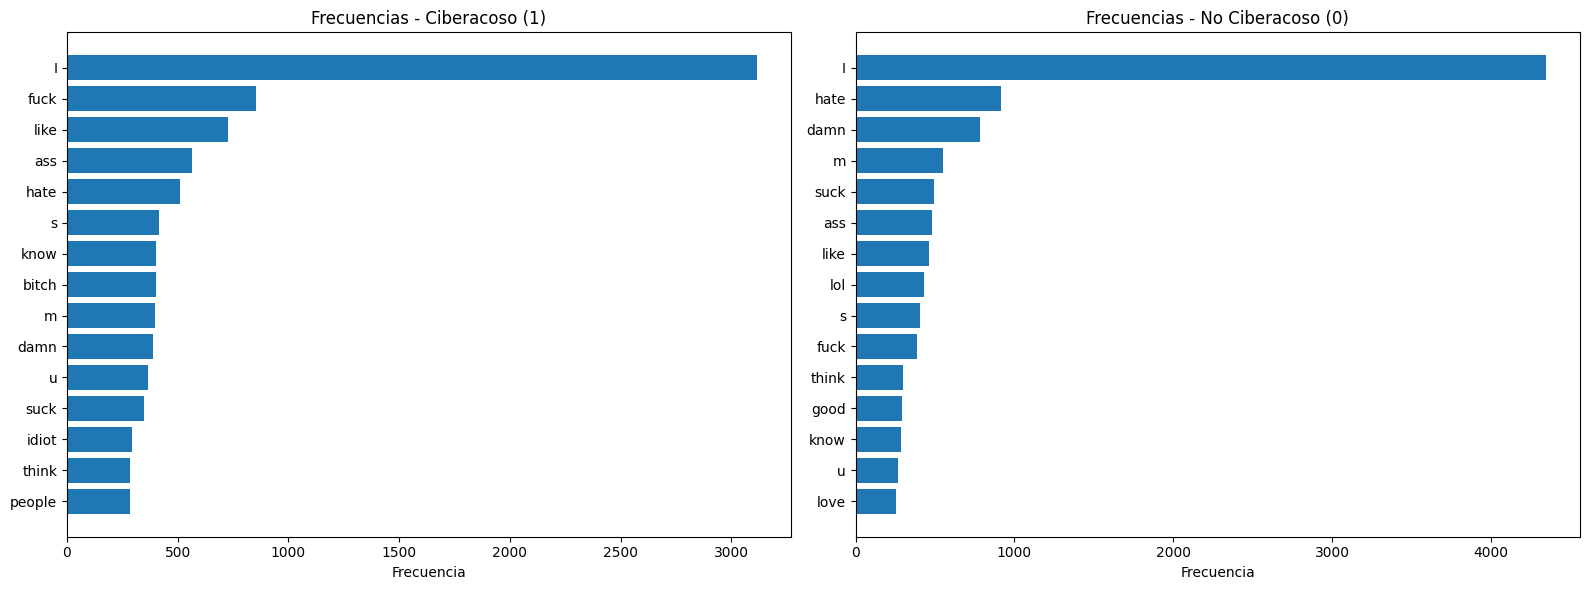

In [9]:
# Tokenizar
lemas_acoso = texto_lemas_acoso.split()
lemas_no_acoso = texto_lemas_no_acoso.split()

# Contar frecuencia
conteo_lemas_acoso = Counter(lemas_acoso).most_common(15)
conteo_lemas_no_acoso = Counter(lemas_no_acoso).most_common(15)

# Preparar datos para graficar
palabras_acoso, frecs_acoso = zip(*conteo_lemas_acoso)
palabras_no_acoso, frecs_no_acoso = zip(*conteo_lemas_no_acoso)

# Graficar
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.barh(palabras_acoso[::-1], frecs_acoso[::-1])
plt.title("Frecuencias - Ciberacoso (1)")
plt.xlabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.barh(palabras_no_acoso[::-1], frecs_no_acoso[::-1])
plt.title("Frecuencias - No Ciberacoso (0)")
plt.xlabel("Frecuencia")

plt.tight_layout()
plt.show()

In [10]:
print("Top 15 palabras más frecuentes en mensajes con ciberacoso (1):")
for palabra, frecuencia in conteo_lemas_acoso:
    print(f"{palabra:<15} {frecuencia}")

print("\nTop 15 palabras más frecuentes en mensajes sin ciberacoso (0):")
for palabra, frecuencia in conteo_lemas_no_acoso:
    print(f"{palabra:<15} {frecuencia}")

Top 15 palabras más frecuentes en mensajes con ciberacoso (1):
I               3114
fuck            853
like            726
ass             566
hate            512
s               417
know            401
bitch           401
m               397
damn            391
u               366
suck            349
idiot           295
think           287
people          284

Top 15 palabras más frecuentes en mensajes sin ciberacoso (0):
I               4344
hate            916
damn            786
m               552
suck            491
ass             480
like            460
lol             430
s               408
fuck            384
think           298
good            289
know            286
u               266
love            251


In [11]:
# Tokenizar todos los textos lematizados
palabras_lemas = " ".join(df["processed_text"]).split()

# Contar frecuencia
conteo_lemas = Counter(palabras_lemas).most_common(20)

# Mostrar resultados
print("Top 20 palabras más frecuentes después de lematización:")
for palabra, frecuencia in conteo_lemas:
    print(f"{palabra:<15} {frecuencia}")

Top 20 palabras más frecuentes después de lematización:
I               7458
hate            1428
fuck            1237
like            1186
damn            1177
ass             1046
m               949
suck            840
s               825
know            687
lol             678
u               632
think           585
bitch           562
good            470
people          458
fucking         415
time            407
want            365
love            351


## Interpretación de las palabras más comunes (después del preprocesamiento)

Una vez aplicadas todas las etapas de limpieza, eliminación de stopwords y lematización, analizamos nuevamente cuáles son las palabras más comunes en los mensajes. Esta vez, los resultados reflejan con mayor claridad el sentimiento del lenguaje utilizado en los tuits.

### Mensajes con ciberacoso (CB_Label = 1)

Las palabras más frecuentes en mensajes ofensivos incluyen:

- **fuck, ass, bitch, idiot, suck**: Estas son palabras con una carga emocional claramente negativa y agresiva. Su aparición masiva confirma que el lenguaje ofensivo se basa en insultos directos y palabras que buscan provocar o humillar.
- **I, like, know, think, u**: Aunque estas palabras no son ofensivas por sí mismas, su presencia en conjunto con insultos sugiere que los mensajes de ciberacoso suelen estar escritos en **primera persona** y dirigidos directamente a otra persona, formando frases del tipo "I think you're an idiot" o "you fuckin suck".
- **damn, m, s**: Estos tokens probablemente son restos de abreviaciones ("I'm", "it's", etc.) o expresiones exclamativas frecuentes en lenguaje informal y emocionalmente cargado.

En resumen, los mensajes ofensivos usan un lenguaje explícitamente agresivo, con intención clara de confrontación y ataque personal.

### Mensajes sin ciberacoso (CB_Label = 0)

En los mensajes no etiquetados como ofensivos también se encuentran palabras como **hate, damn, ass, fuck**, pero en estos casos probablemente se usan en **contextos diferentes**, como expresiones de frustración o lenguaje coloquial. Ejemplos:
- "I hate Mondays"
- "That movie was fuckin' awesome"
- "Damn, I forgot my keys!"

Esto demuestra que el simple uso de una palabra fuerte no siempre implica una intención de dañar. El **contexto emocional y gramatical** es clave para distinguir entre un insulto y una expresión.

También encontramos palabras más neutras o positivas como:
- **good, love, lol, think**: Estas reflejan un tono más ligero, amistoso o reflexivo, típico de interacciones cotidianas en redes sociales.

Además, la palabra **I** aparece con mucha más frecuencia en mensajes no ofensivos, lo cual sugiere que las personas suelen hablar más **de sí mismas** en tono neutral, mientras que los mensajes de ciberacoso tienden a centrarse **en atacar al otro**.

Aunque muchas palabras aparecen en ambas clases, su **frecuencia y combinación con otras palabras** nos ayudan a trazar un perfil claro del lenguaje ofensivo. Esta exploración nos deja dos conclusiones importantes:

1. **El contenido emocional y ofensivo es más evidente en los mensajes de ciberacoso**, incluso después de limpiar el texto.
2. **El contexto importa mucho**: no basta con detectar una "mala palabra", sino que se necesita analizar cómo y con qué intención se está usando.


## Modelado

### Entrenamiento con TF-IDF + Regresión Logística

TF-IDF son las siglas de Term Frequency – Inverse Document Frequency (Frecuencia de término - Frecuencia inversa de documento). Es una técnica que convierte texto en números, y se usa para representar qué tan importante es una palabra dentro de un documento.
- TF (Term Frequency): mide cuántas veces aparece una palabra en un documento.
- IDF (Inverse Document Frequency): penaliza las palabras que aparecen en muchos documentos, ya que son menos informativas (como “the” o “is”).

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1128
           1       0.73      0.65      0.69      1092

    accuracy                           0.71      2220
   macro avg       0.71      0.71      0.71      2220
weighted avg       0.71      0.71      0.71      2220

Precisión global (accuracy): 0.7117117117117117


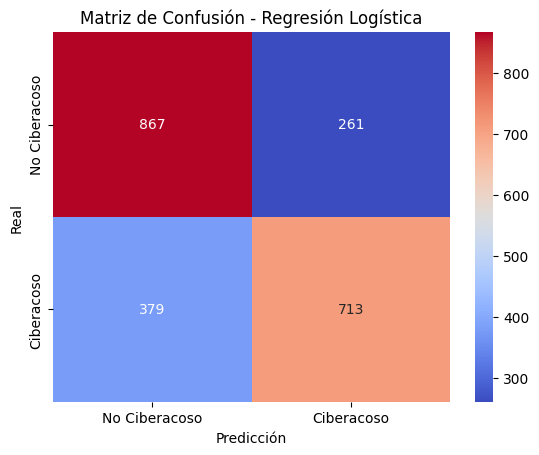

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# División de los datos
X = df["processed_text"]
y = df["CB_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entrenamiento del modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_tfidf, y_train)

# Predicciones
y_pred = modelo.predict(X_test_tfidf)

# Evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Precisión global (accuracy):", accuracy_score(y_test, y_pred))

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="coolwarm", xticklabels=["No Ciberacoso", "Ciberacoso"], yticklabels=["No Ciberacoso", "Ciberacoso"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


## Evaluación del modelo de Regresión Logística

Después de entrenar un modelo de regresión logística utilizando la representación TF-IDF de los textos lematizados, se obtienen los siguientes resultados en el conjunto de prueba:

### Métricas generales

- **Precisión global (accuracy)**: 71.1%
  - Esto significa que, en promedio, el modelo acertó en 7 de cada 10 casos.

- **F1-score**:
  - Clase 0 (No ciberacoso): 0.73
  - Clase 1 (Ciberacoso): 0.69

El F1-score mide el balance entre precisión y recall. En este caso, el modelo detecta mejor los mensajes no ofensivos, aunque también logra un desempeño aceptable con los ofensivos.

### Matriz de confusión

|                       | Predicho: No Ciberacoso (0) | Predicho: Ciberacoso (1) |
|-----------------------|-----------------------------|---------------------------|
| Real: No Ciberacoso (0) | 867                         | 261                       |
| Real: Ciberacoso (1)    | 379                         | 713                       |

- El modelo acertó en 867 casos de mensajes no ofensivos y en 713 casos de mensajes ofensivos**.
- Sin embargo, 261 mensajes ofensivos fueron clasificados como no ofensivos, lo que representa un área de mejora importante (posibles falsos negativos).
- También clasificó como ofensivos 379 mensajes que en realidad no lo eran (falsos positivos), lo que sugiere cierta sensibilidad al lenguaje fuerte incluso cuando no hay intención ofensiva.

El modelo tiene un comportamiento equilibrado, pero tiende a ser un poco más conservador con los mensajes ofensivos. Prefiere equivocarse diciendo que un mensaje es ofensivo cuando no lo es, en lugar de dejar pasar uno que sí lo es. Esto puede ser aceptable en contextos donde es más importante prevenir el daño (por ejemplo, moderación en plataformas).

A pesar de no ser perfecto, este modelo representa una base sólida para tareas de detección de ciberacoso.



## Entrenamiento con SVM (Máquina de Vectores de Soporte)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1128
           1       0.70      0.66      0.68      1092

    accuracy                           0.69      2220
   macro avg       0.69      0.69      0.69      2220
weighted avg       0.69      0.69      0.69      2220

Precisión global (accuracy): 0.6918918918918919


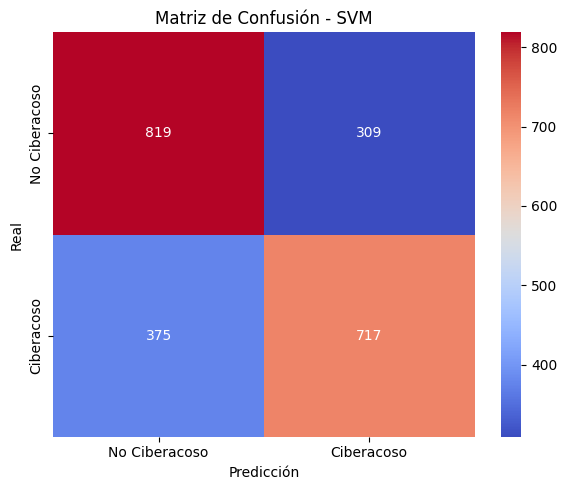

In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entrenar modelo SVM lineal
modelo_svm = LinearSVC()
modelo_svm.fit(X_train_tfidf, y_train)

# Predicción
y_pred_svm = modelo_svm.predict(X_test_tfidf)

# Evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_svm))

print("Precisión global (accuracy):", accuracy_score(y_test, y_pred_svm))


# Gráfico de matriz de confusión
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap="coolwarm",
            xticklabels=["No Ciberacoso", "Ciberacoso"],
            yticklabels=["No Ciberacoso", "Ciberacoso"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.tight_layout()
plt.show()


## Evaluación del modelo SVM

Después de entrenar un modelo SVM lineal usando la misma representación TF-IDF que con regresión logística, obtuvimos los siguientes resultados:

### Métricas generales

- **Precisión global (accuracy)**: 69.2%
  - Es decir, el modelo acertó en aproximadamente 7 de cada 10 predicciones.

- **F1-score**:
  - Clase 0 (No ciberacoso): 0.71
  - Clase 1 (Ciberacoso): 0.68

En términos generales, el modelo tiene un rendimiento parecido al de regresión logística, aunque ligeramente inferior en precisión total y balance entre las clases.

### Matriz de confusión

- El modelo identificó correctamente 819 tuits no ofensivos y 717 tuits ofensivos.
- Se equivocó en 309 casos, clasificando como ofensivo un mensaje que no lo era (falso positivo).
- También falló en 375 mensajes ofensivos que no logró detectar (falsos negativos).

### Comparación con Regresión Logística

| Métrica                | Regresión Logística | SVM |
|------------------------|---------------------|-----|
| Precisión global       | 71.1%           | 69.2% |
| F1-score (Cib. 1)      | 0.69            | 0.68 |
| Falsos negativos (Cib. 1 como 0) | 379           | 375 |
| Falsos positivos (No Cib. 0 como 1) | 261           | 309 |

- Regresión logística tuvo mejor precisión general y balance, especialmente porque cometió menos errores clasificando mensajes no ofensivos como ofensivos.
- SVM fue ligeramente mejor detectando casos de ciberacoso (menos falsos negativos), pero a costa de aumentar los falsos positivos.
- Ambos modelos tienen un desempeño similar, pero la regresión logística fue más equilibrada en este caso.

Ambos modelos son buenas opciones para un sistema de detección de ciberacoso básico. Sin embargo, si el objetivo es evitar acusaciones falsas (falsos positivos), la regresión logística ofrece un mejor comportamiento. Por otro lado, si el enfoque está en detectar la mayor cantidad posible de agresiones, SVM podría ser preferible.

## Entrenamiento con Random Forest

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1128
           1       0.76      0.63      0.69      1092

    accuracy                           0.72      2220
   macro avg       0.73      0.72      0.72      2220
weighted avg       0.73      0.72      0.72      2220

Precisión global (accuracy): 0.7207207207207207


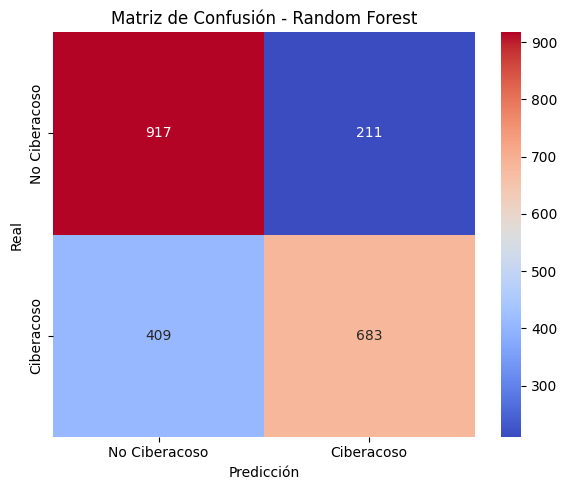

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_tfidf, y_train)

# Predicción
y_pred_rf = modelo_rf.predict(X_test_tfidf)

# Evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

print("Precisión global (accuracy):", accuracy_score(y_test, y_pred_rf))

# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Gráfico
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="coolwarm",
            xticklabels=["No Ciberacoso", "Ciberacoso"],
            yticklabels=["No Ciberacoso", "Ciberacoso"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.tight_layout()
plt.show()


## Evaluación del modelo Random Forest

Después de aplicar el modelo Random Forest sobre los textos lematizados y vectorizados con TF-IDF, obtuvimos resultados bastante sólidos. Este modelo, basado en múltiples árboles de decisión, busca capturar patrones más complejos y no lineales en los datos.

### Métricas generales

- **Precisión global (accuracy)**: 72.1%
  - El modelo acertó en poco más de 7 de cada 10 predicciones.
- **F1-score**:
  - Clase 0 (No ciberacoso): 0.75
  - Clase 1 (Ciberacoso): 0.69

En general, el modelo logra un equilibrio: tiene una buena capacidad para reconocer mensajes no ofensivos, sin perder demasiada precisión al detectar casos de ciberacoso.

### Matriz de confusión
- 917 tuits no ofensivos fueron correctamente clasificados.
- 683 mensajes ofensivos también fueron detectados correctamente.
- Sin embargo, aún hay 409 mensajes ofensivos que no fueron detectados (falsos negativos), y 211 mensajes no ofensivos que se clasificaron incorrectamente como ofensivos (falsos positivos).

## Comparación entre modelos

| Modelo               | Accuracy | F1 No Cib. | F1 Cib. | Falsos Pos. | Falsos Neg. |
|----------------------|----------|------------|---------|-------------|-------------|
| Regresión Logística  | **71.1%**  | 0.73       | 0.69    | **261**     | 379         |
| SVM                  | 69.2%     | 0.71       | 0.68    | 309         | **375**     |
| **Random Forest**    | **72.1%**  | **0.75**   | 0.69    | **211**     | **409**     |

- Random Forest fue el modelo con mayor precisión general y el mejor F1-score para mensajes no ofensivos.
- Fue también el que cometió menos falsos positivos, es decir, fue más cuidadoso al no señalar erróneamente como ofensivos los mensajes neutrales.
- Sin embargo, tuvo el mayor número de falsos negativos, lo que significa que dejó pasar más mensajes ofensivos sin detectarlos.

Cada modelo tiene fortalezas distintas:

- **Regresión logística** es la opción más balanceada: detecta bien ambos tipos de mensajes, con pocos falsos negativos.
- **SVM** tiene un rendimiento similar, pero con más errores, especialmente con los mensajes no ofensivos.
- **Random Forest** es el más preciso globalmente y el que menos acusa falsamente, pero deja pasar más mensajes ofensivos, lo cual puede ser crítico en contextos sensibles.

La elección del modelo final dependerá del objetivo del sistema:
- Si se busca evitar acusaciones injustas, Random Forest es ideal.
- Si se prioriza detectar todos los casos posibles de ciberacoso, la regresión logística es una mejor opción inicial.


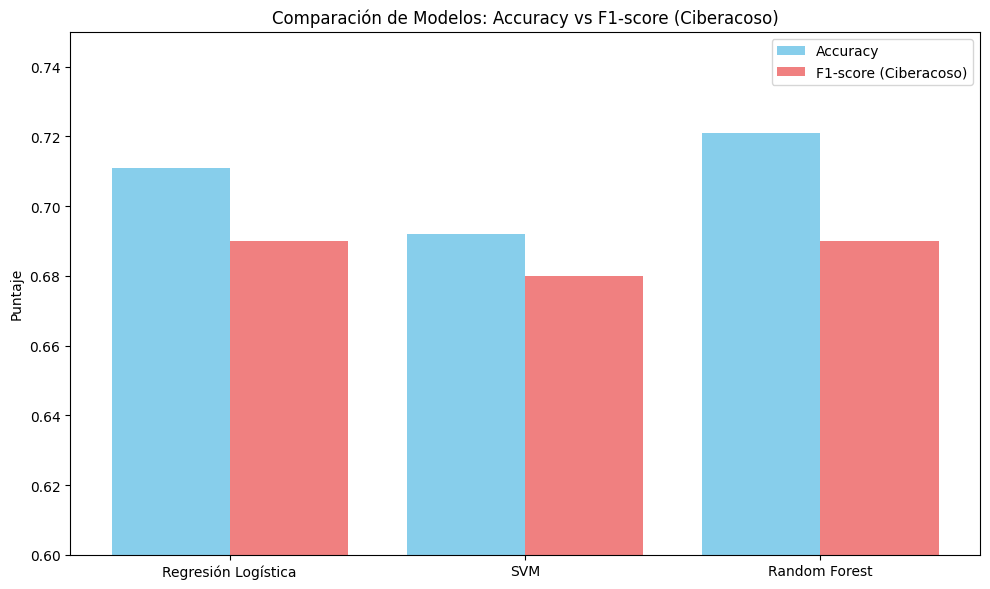

In [15]:
import matplotlib.pyplot as plt

# Datos
modelos = ["Regresión Logística", "SVM", "Random Forest"]
accuracy = [0.711, 0.692, 0.721]
f1_ciberacoso = [0.69, 0.68, 0.69]

# Gráfico
plt.figure(figsize=(10, 6))

# Accuracy
plt.bar(modelos, accuracy, width=0.4, label="Accuracy", color="skyblue")

# F1-score para ciberacoso
plt.bar([i + 0.4 for i in range(len(modelos))], f1_ciberacoso, width=0.4, label="F1-score (Ciberacoso)", color="lightcoral")

# Ajustes
plt.xticks([i + 0.2 for i in range(len(modelos))], modelos)
plt.ylim(0.6, 0.75)
plt.ylabel("Puntaje")
plt.title("Comparación de Modelos: Accuracy vs F1-score (Ciberacoso)")
plt.legend()
plt.tight_layout()
plt.show()

## Extraer emociones usando el modelo RoBERTa

In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
from torch.nn.functional import softmax
from tqdm import tqdm

# Cargar modelo preentrenado
modelo_emociones = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(modelo_emociones)
model = AutoModelForSequenceClassification.from_pretrained(modelo_emociones)
#model.to("cpu")
model.to("cuda")  # usar GPU

# Etiquetas del modelo
etiquetas = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# Función para extraer emociones
def extraer_emociones(texto):
    inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True, max_length=128).to("cuda")
    with torch.no_grad():
        outputs = model(**inputs)
    scores = softmax(outputs.logits, dim=1).cpu().numpy()[0]
    return dict(zip(etiquetas, scores))

# Aplicar a una muestra del dataset para demostración (ajustable)
subset = df.sample(500, random_state=42).copy()  # puedes usar df si quieres todo
emociones = []

for texto in tqdm(subset["processed_text"]):
    emociones.append(extraer_emociones(texto))

# Convertir a DataFrame
df_emociones = pd.DataFrame(emociones)
df_final = pd.concat([subset.reset_index(drop=True), df_emociones], axis=1)

# Ver muestra
df_final.head()


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 235.14it/s]


,Text,CB_Label,text_length,clean_text,processed_text,anger,disgust,fear,joy,neutral,sadness,surprise
0,I hate to point out that the new one is much c...,0,122,i hate to point out that the new one is much c...,I hate point new close plot book movie originally,0.711805,0.090288,0.005850,0.007785,0.067018,0.086656,0.030598
1,Yeah. I'm not going to go offf about how long ...,0,97,yeah im not going to go offf about how long th...,yeah I m offf long dn d remake development damn,0.068022,0.056848,0.048757,0.085938,0.290834,0.373502,0.076098
2,Yeah im all alone currently waiting for timo...,0,76,yeah im all alone currently waiting for timoth...,yeah I m currently wait timothy home I miss,0.000811,0.001253,0.001326,0.003570,0.016438,0.970175,0.006427
3,I will kick that pirate's ass if he got marrie...,1,66,i will kick that pirates ass if he got married...,I kick pirate ass marry sayin,0.946860,0.013058,0.007169,0.010705,0.010876,0.007952,0.003379
4,dont hate too hard! it hasn't been very warm ...,1,58,dont hate too hard it hasnt been very warm her...,hate hard warm lately,0.521452,0.011352,0.002317,0.016099,0.058040,0.376410,0.014330


## Entrenar modelo con emociones

Reporte de clasificación (modelo basado en emociones):
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        57
           1       0.56      0.44      0.49        43

    accuracy                           0.61       100
   macro avg       0.60      0.59      0.59       100
weighted avg       0.60      0.61      0.60       100

Precisión global: 0.61


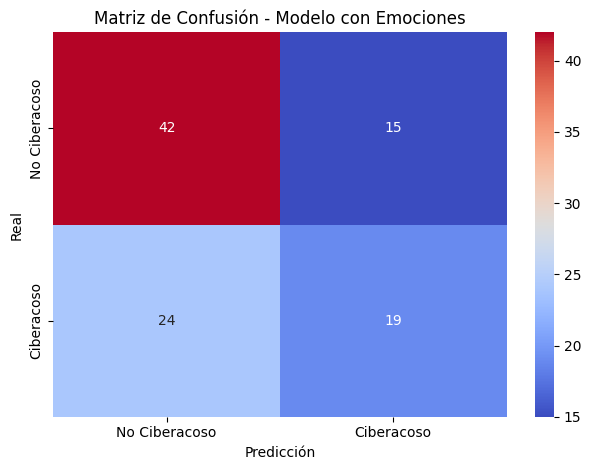

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de variables de entrada (emociones)
X = df_final[["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]]
y = df_final["CB_Label"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento con regresión logística
modelo_emocional = LogisticRegression(max_iter=1000)
modelo_emocional.fit(X_train, y_train)

# Predicción
y_pred_emociones = modelo_emocional.predict(X_test)

# Evaluación
print("Reporte de clasificación (modelo basado en emociones):")
print(classification_report(y_test, y_pred_emociones))
print("Precisión global:", accuracy_score(y_test, y_pred_emociones))

# Matriz de confusión
conf_emociones = confusion_matrix(y_test, y_pred_emociones)
sns.heatmap(conf_emociones, annot=True, fmt='d', cmap="coolwarm",
            xticklabels=["No Ciberacoso", "Ciberacoso"],
            yticklabels=["No Ciberacoso", "Ciberacoso"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Modelo con Emociones")
plt.tight_layout()
plt.show()


## Evaluación del modelo basado en emociones

En esta etapa, se utiliza un modelo de lenguaje avanzado (RoBERTa) para identificar emociones expresadas en los tuits, y entrenamos un modelo clásico (regresión logística) no con el texto, sino con las emociones detectadas.

### Resultados generales

- **Precisión global (accuracy)**: 61%
  - Es decir, el modelo acertó en poco más de 6 de cada 10 casos.
- **F1-score clase 0 (No ciberacoso)**: 0.68
- **F1-score clase 1 (Ciberacoso)**: 0.49

Esto indica que el modelo se desempeñó mejor al identificar mensajes no ofensivos, pero tuvo dificultades para detectar ciberacoso con base únicamente en las emociones.

### Matriz de confusión

- Detectó correctamente 42 mensajes no ofensivos y solo 19 ofensivos.
- Falló en 24 mensajes ofensivos que clasificó erróneamente como neutros.

## Comparación con modelos anteriores

| Modelo               | Accuracy | F1 (Cib. 1) | Falsos negativos |
|----------------------|----------|-------------|------------------|
| Regresión Logística  | 71.1%    | 0.69        | 379              |
| SVM                  | 69.2%    | 0.68        | 375              |
| Random Forest        | **72.1%**| 0.69        | **409**          |
| **Emociones (RoBERTa)**| 61.0%  | **0.49**    | 24 (de 43)       |

### Interpretación

- Este modelo no trabaja con el texto directamente, sino con los **niveles de emoción detectados** en cada mensaje.
- Aunque los resultados no superan a los modelos anteriores, **ofrece una nueva dimensión**: revela cómo las emociones influyen en el lenguaje ofensivo.
- Es especialmente útil si se quiere construir un sistema que **combine señales lingüísticas con emocionales**.


El enfoque emocional es valioso como complemento, pero por sí solo no ofrece el mismo rendimiento que los modelos clásicos basados en texto.


## Despliegue del modelo

Después de entrenar y comparar distintos modelos para detectar ciberacoso en Twitter, es momento de pensar cómo podríamos llevar esta solución a un entorno real. Aunque este proyecto fue académico, los resultados tienen potencial para aplicarse de forma práctica en la vida cotidiana digital.

### ¿Dónde podría usarse este modelo?

1. **Moderación en redes sociales**  
   Este modelo podría integrarse en sistemas que revisan contenido automáticamente. No para eliminar mensajes directamente, sino para ayudar a detectar posibles casos de ciberacoso y marcarlos para revisión humana o generar alertas tempranas.

2. **Prevención en contextos escolares o universitarios**  
   Escuelas, preparatorias o universidades podrían usar una versión adaptada del modelo para monitorear conversaciones en plataformas educativas, buscando prevenir conflictos o apoyar a estudiantes que pudieran estar siendo acosados en línea.

3. **Investigación social y análisis de tendencias**  
   Investigadores podrían usar estos modelos para estudiar cómo se expresa el ciberacoso en redes, qué palabras lo acompañan, o cómo cambia el discurso social en diferentes contextos, eventos o momentos del año.

### Algunas limitaciones que vale la pena tener en cuenta

- Este modelo fue entrenado con tuits en inglés, por lo que no se puede aplicar directamente en otros idiomas sin ajustarlo.
- No todos los mensajes ofensivos usan insultos directos; algunos pueden ser sarcasmos, indirectas o lenguaje ambiguo, que el modelo podría no detectar fácilmente.
- El análisis emocional aporta información interesante, pero no es suficiente por sí solo para determinar si hay o no ciberacoso.

### Trabajo futuro

- Hacer que el modelo entienda mejor el contexto, detecte sarcasmo o analice la relación entre usuarios.
- Combinar diferentes tipos de análisis: palabras, emociones, hashtags, hora de publicación, etc.
- Usar modelos más potentes, como BERT ajustado específicamente al tema del ciberacoso.
- Diseñar una interfaz sencilla, como un pequeño sistema o panel, donde cualquier persona pueda escribir un mensaje y saber si podría considerarse ofensivo antes de publicarlo.

### Conclusión

Este proyecto demostró que, con las herramientas adecuadas, la minería de datos puede ayudarnos a entender y prevenir problemas sociales, como el ciberacoso. Si bien no es una solución final, sí es un primer paso sólido hacia herramientas tecnológicas más humanas y responsables, que protejan los espacios digitales donde convivimos todos los días.
